## 3.1.7 Aufgaben<a id='aufgaben'></a> 

## Projekt: Überlebensvorhersage auf der Titanic



<img src = 'https://media.nationalgeographic.org/assets/photos/000/273/27302_c0-41-990-701_r1050x700.jpg?d4ccf3044d9da0d0118103be3a76bd1319370847' >

### Hintergrund


Die [Titanic](https://de.wikipedia.org/wiki/RMS_Titanic) war ein britisches Passagierschiff der White Star Line, das in den frühen Morgenstunden des 15. April 1912 im Nordatlantik sank, nachdem es während seiner Jungfernfahrt von Southampton nach New York City einen Eisberg getroffen hatte. Von den geschätzten 2.224 Passagieren und Besatzungsmitgliedern an Bord starben mehr als 1.500, was den Untergang zu einer der tödlichsten zivilen Schiffskatastrophen der modernen Geschichte in Friedenszeiten macht.

Obwohl es etwa 2.224 Passagiere und Besatzungsmitglieder gab, liegen uns nur Daten von etwa 1.300 Passagieren vor. Von diesen 1.300 Passagierdatenpunkten werden etwa 900 Daten zu Trainingszwecken (Datei: *train_titanic.csv*) und die restlichen 400 zu Testzwecken (Datei: *test_titanic.csv*) verwendet. **In diesem Projekt erhältst du etwa 400 Testdaten mit fehlender Überlebensspalte (Zielvariable 'Survived': 0 = Nein, 1 = Ja) und musst verschiedene maschinelle Lernalgorithmen verwenden, um vorherzusagen, ob die Passagiere in den Testdaten überlebt haben oder nicht.**

Sowohl die Trainings- als auch die Testdaten sind nicht sauber (enthalten viele fehlende Werte), daher ist das **Hauptziel dieses Projekts**, 

- **die Daten zu bereinigen** und
- **das Modell mit der besten Genauigkeit zu erstellen.**

Deine Lösung der Aufgabenstellung sollte die folgende Struktur aufweisen:

* Importieren der erforderlichen Bibliotheken
* Einlesen der Daten und ein erster Datenüberblick 
* Datenanalyse
* Datenvisualisierung
* Datenbereinigung
* Auswahl des besten Modells

**Viel Erfolg!**

### Variablenbeschreibung

**[1] Survived              :** 0 = Nein, 1 = Ja (Zielvariable)
<br>**[2] Pclass            :** Die gebuchte Kabinenklasse: 1., 2. oder 3. Klasse
<br>**[3] SibSp             :** Die Anzahl der Geschwister / Ehepartner an Bord der Titanic; Geschwister = Bruder, Schwester, Stiefbruder, Stiefschwester; Ehepartner = Ehemann, Ehefrau (Geliebte und Verlobte wurden ignoriert) 
<br>**[4] Parch             :** Die Anzahl der Eltern / Kinder an Bord der Titanic;  Eltern = Mutter, Vater; Kind = Tochter, Sohn, Stieftochter, Stiefsohn. Manche Kinder sind nur mit der Nanny gereist, daher ist für sie parch=0. 
<br>**[5] Ticket            :** Ticketnummer
<br>**[6] Fare              :** Passagierfahrpreis
<br>**[7] Cabin             :** Kabinennummer
<br>**[8] Embarked          :** Einschiffungshafen: C = Cherbourg, Q = Queenstown, S = Southampton 


The Variablen 'Name', 'Sex' , und 'Age' sind selbsterklärend. 

## 1 Importieren der erforderlichen Bibliotheken

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import this
import warnings

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# errors should never pass silently, unless explicitly silenced
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 2 Einlesen der Daten und ein erster Datenüberblick

In [76]:
titanic_train = pd.read_csv("train_titanic.csv", index_col="PassengerId")
titanic_test = pd.read_csv("test_titanic.csv", index_col="PassengerId")

In [77]:
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [78]:
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Als Erstes fällt auf, dass die Trainings- und Testdaten anscheinend aus demselben Datensatz stammen und die Testdaten keine Random-Samples aus dem Datensatz sind, sondern einfach die letzten 418 Zeilen, da die PassengerId fortlaufend ist und direkt an die Trainingsdaten anschließt. Inwieweit das gut oder schlecht ist, kann ich nicht beurteilen, da ich nicht weiß, in welcher Reihenfolge bzw. nach welchen Kriterien die PassengerId vergeben wurde.  

In [79]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Die Daten scheinen aber auf den ersten Blick einigermaßen gleich verteilt über die Trainings- und Testdaten.

In [81]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [82]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## 3 Datenanalyse und -visualisierung
### 3.1 Überblick

c:\Users\tk\anaconda3\envs\test_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'All Nummerical Features by Survival')

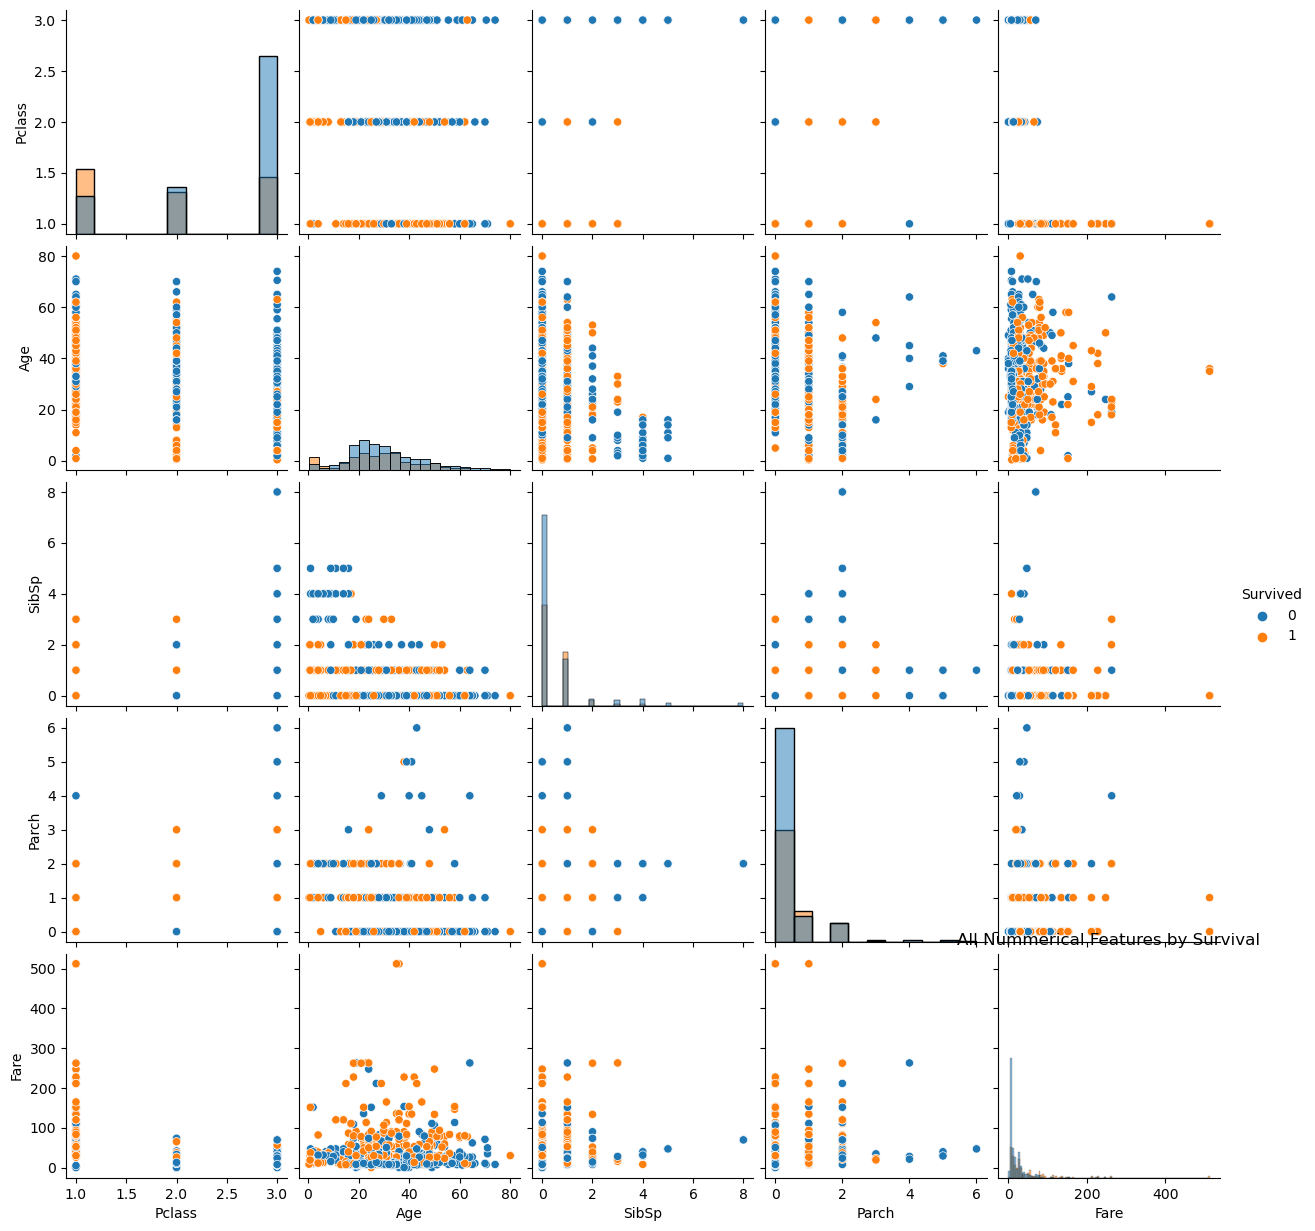

In [83]:
sns.pairplot(titanic_train, hue="Survived", diag_kind="hist")
plt.title("All Nummerical Features by Survival")

Text(0.5, 1.0, 'Heatmap of Correlations')

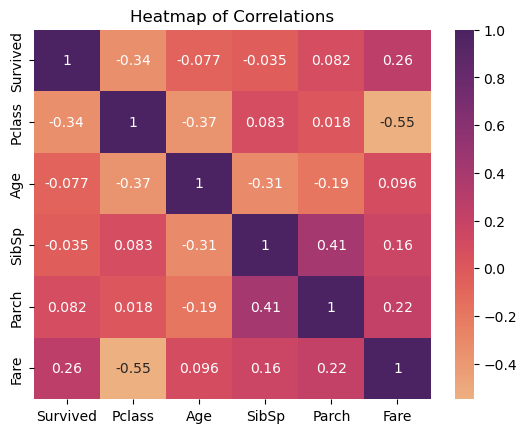

In [84]:
sns.heatmap(titanic_train.corr(numeric_only=True), cmap="flare", annot=True)
plt.title("Heatmap of Correlations")

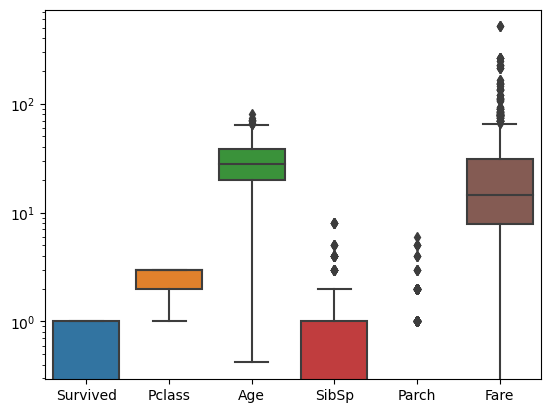

In [85]:
sns.boxplot(data=titanic_train)
plt.yscale("log")

In [86]:
titanic_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [87]:
titanic_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Es gibt fehlende Werte (NaN) in den Spalten Age, Cabin, Embarked und Fare. Darum werden wir uns später kümmern.

Als Nächstes sehen wir uns die einzelnen Spalten an.

### 3.2 PassengerId
Wir werden `PassengerId` löschen, da es keine für die Klassifikation hilfreichen Daten enthält.

### 3.3 Survived
Das ist offensichtlich unser Zielvektor.

Text(0.5, 1.0, 'Surviving Passengers')

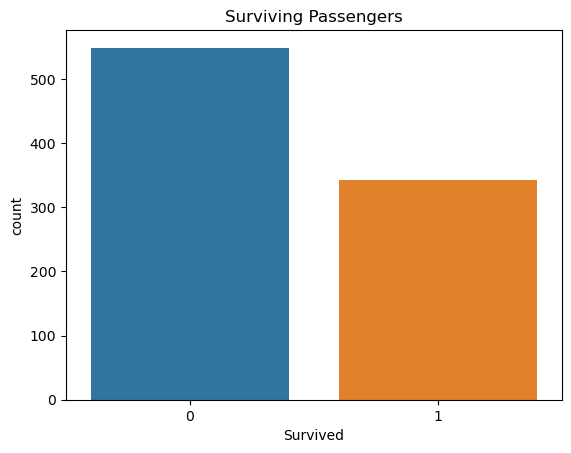

In [88]:
sns.countplot(data=titanic_train, x="Survived")
plt.title("Surviving Passengers")

### 3.4 Pclass

Ist sicher wichtig für die Klassifikation. Wir erinnern uns alle an den Film :(

Text(0.5, 1.0, 'Passengers by Pclass')

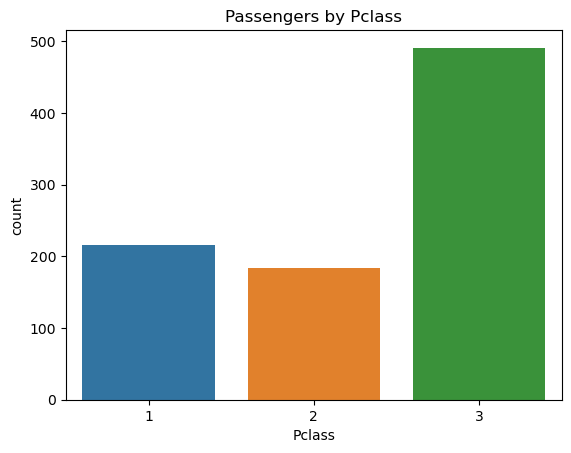

In [89]:
sns.countplot(x="Pclass",  data=titanic_train)
plt.title("Passengers by Pclass")

Text(0.5, 1.0, 'Survivors by Pclass')

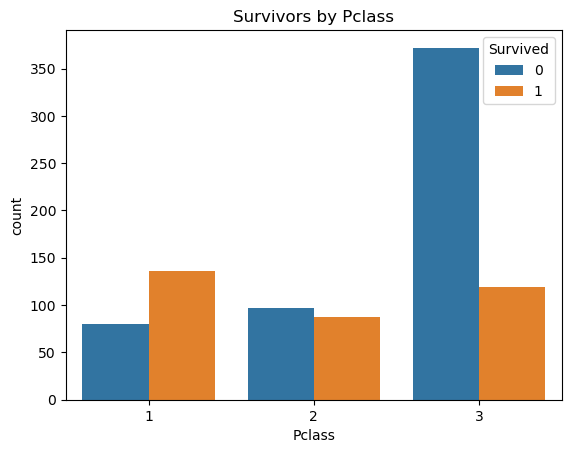

In [90]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_train)
plt.title("Survivors by Pclass")

Jupp...

### 3.5 Name

Was können wir mit `Name` anfangen? Man könnte versuchen, Familien (Ehepaare, Eltern und Kinder, Geschwister) anhand der Nachnamen zu finden, vielleicht noch unverheiratete Frauen und minderjährige Mädchen (`contains("Miss.")`) oder minderjährige Jungen (`contains("Master.")`). Erscheint aufwändig und wenig zielführend. Deshalb werden wir `Name` löschen.

### 3.6 Sex und Age

Sind sicher auch wichtig für die Klassifikation. "Women and children first!"

`Age` enthält 177 fehlende Werte, die wir irgendwie behandeln müssen. 

`Age` ggf. in Agegroups zusammenfassen?

`Sex` sollten wir noch nummerisch kodieren.

Text(0.5, 1.0, 'Survivors by Sex')

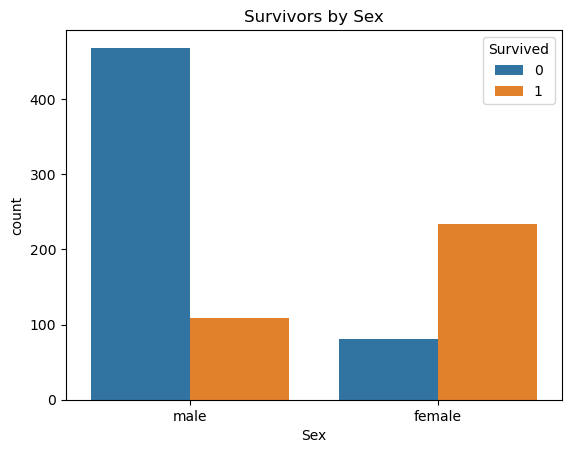

In [91]:
sns.countplot(x="Sex", hue="Survived", data=titanic_train)
plt.title("Survivors by Sex")

Text(0.5, 1.0, 'Survivors by Age')

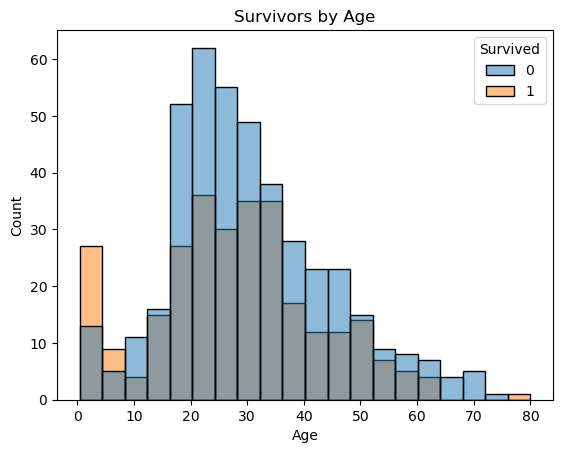

In [92]:
sns.histplot(x="Age", hue="Survived", data=titanic_train, bins=20)
plt.title("Survivors by Age")

### 3.7 SibSp und Parch

Text(0.5, 1.0, 'Survivors by Number of Siblings/Spouses on Board')

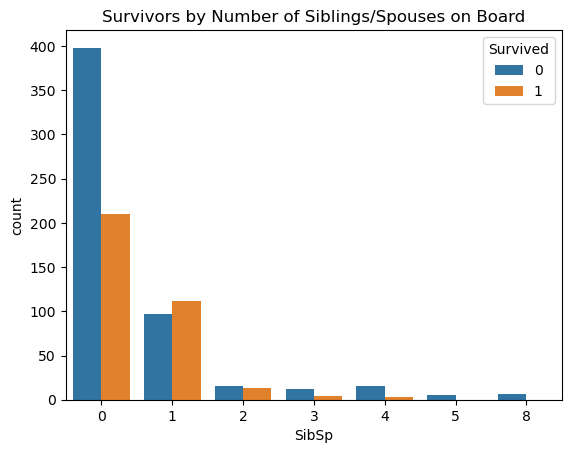

In [93]:
sns.countplot(x="SibSp", hue="Survived", data=titanic_train)
plt.title("Survivors by Number of Siblings/Spouses on Board")

Text(0.5, 1.0, 'Survivors by Number of Parents/Children on Board')

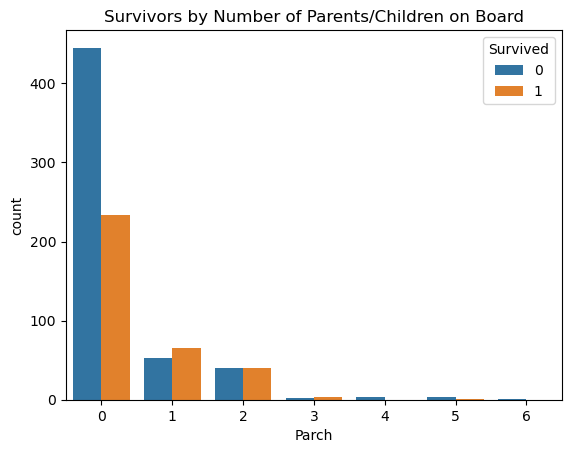

In [94]:
sns.countplot(x="Parch", hue="Survived", data=titanic_train)
plt.title("Survivors by Number of Parents/Children on Board")

Es scheint, als ob Alleinreisende eine schlechtere Überlebenschance hätten, als die anderen Gruppen. In der Guppe von Personen mit einer Begleitperson haben jeweils mehr als die Hälfte überlebt.

### 3.8 Ticket

In [95]:
(titanic_train.Ticket.value_counts())

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [96]:
titanic_train[titanic_train.Ticket=="347082"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


Es gibt 681 Tickets für 891 Passagiere. Anhand der Ticketnummer könnte man z.B. versuchen Familien zu finden. Hilft uns das weiter? Meh...wir löschen `Ticket` ebenfalls.

### 3.9 Fare
Es ist naheliegend, dass Fare und Pclass korrelieren. Je niedriger (besser) die Klasse, desto höher die Ticketpreise. Es gibt 15 Einträge, die 0 sind. Es ist unklar, wie die entstanden sind. Vllt. Crewmitglieder, die als Passagiere geführt wurden? Wir werden die Null-Einträge vorerst ignorieren.

In [97]:
titanic_train[titanic_train.Fare==0].sort_values(by="Pclass")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S


In [98]:
# die häufigsten Ticketpreise
titanic_train.Fare.value_counts().sort_values(ascending=False)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
32.3208     1
8.3625      1
8.4333      1
25.5875     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [99]:
# Die teuersten Tickets
titanic_train.Fare.value_counts().sort_index(ascending=False)

Fare
512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
            ..
6.4375       1
6.2375       1
5.0000       1
4.0125       1
0.0000      15
Name: count, Length: 248, dtype: int64

In [100]:
titanic_train[titanic_train.Fare == 512.3292]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Text(0.5, 1.0, 'Survivors by Fare')

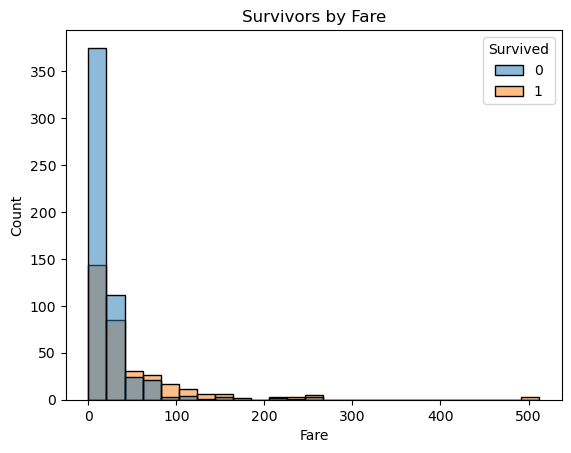

In [101]:
sns.histplot(x="Fare", hue="Survived", data=titanic_train, bins=25)
plt.title("Survivors by Fare")

c:\Users\tk\anaconda3\envs\test_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Fareprices by Pclass')

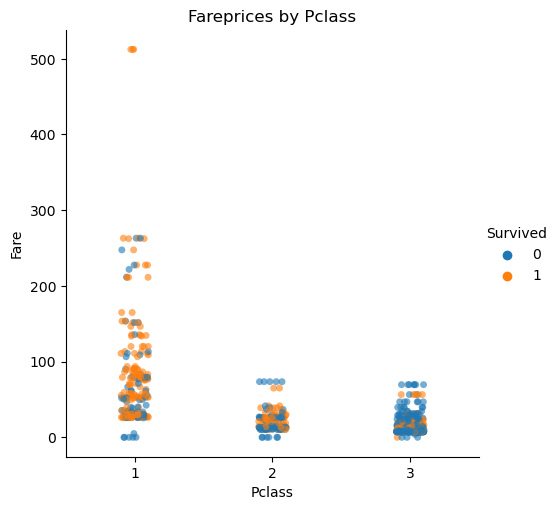

In [102]:
sns.catplot(y="Fare", x="Pclass", hue="Survived", data=titanic_train, alpha=0.6)
plt.title("Fareprices by Pclass")

### 3.10 Cabin
`Cabin` enthält 687 fehlende Werte, das sind fast 80%. Damit ist die Spalte wahrscheinlich unbrauchbar und wir werden sie löschen.

In [103]:
titanic_train[titanic_train.Cabin.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


### 3.11 Embarked
Wir werden `Embarked` nachher auch nummerisch kodieren.

Text(0.5, 1.0, 'Passengers by Port of Embarkation')

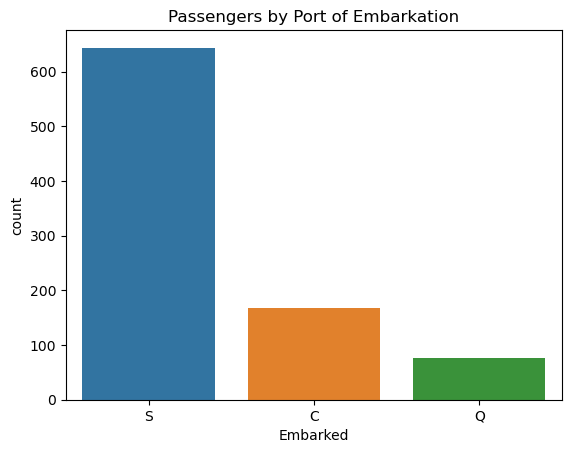

In [104]:
sns.countplot(x="Embarked", data=titanic_train)
plt.title("Passengers by Port of Embarkation")

Text(0.5, 1.0, 'Passengers by Port of Embarkation and Class')

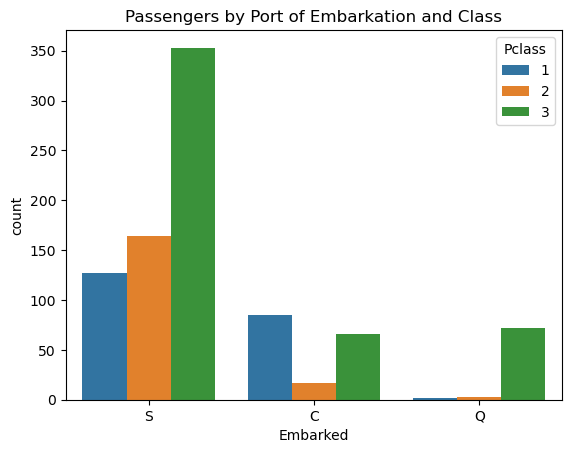

In [105]:
sns.countplot(x="Embarked", hue="Pclass",  data=titanic_train)
plt.title("Passengers by Port of Embarkation and Class")

Text(0.5, 1.0, 'Survivors by Port of Embarkation')

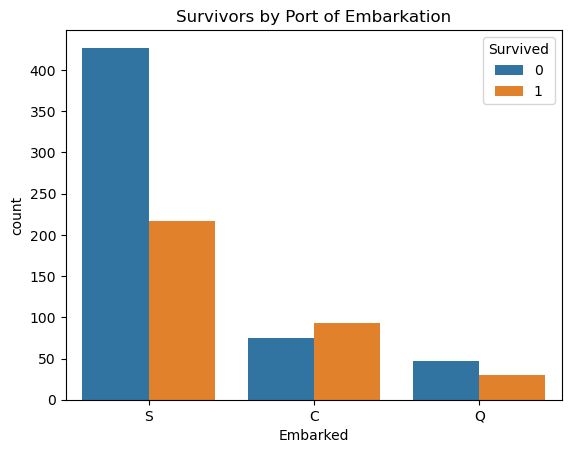

In [106]:
sns.countplot(x="Embarked", hue="Survived", data=titanic_train)
plt.title("Survivors by Port of Embarkation")

## 4 Feature Engineering
### 4.1 Spalten löschen
Wir löschen die Spalten `PassengerId`, `Name`, `Ticket` und `Cabin`, wie oben besprochen.

In [107]:
# titanic_train.drop("PassengerId", axis=1, inplace=True)
# titanic_test.drop("PassengerId", axis=1, inplace=True)

In [108]:
titanic_train.drop("Name", axis=1, inplace=True)
titanic_test.drop("Name", axis=1, inplace=True)

In [109]:
titanic_train.drop("Ticket", axis=1, inplace=True)
titanic_test.drop("Ticket", axis=1, inplace=True)

In [110]:
titanic_train.drop("Cabin", axis=1, inplace=True)
titanic_test.drop("Cabin", axis=1, inplace=True)

### 4.2 Fehlende Werte
Es gab fehlende Werte (NaN) in den Spalten `Age`, `Cabin`, `Embarked` und `Fare`. `Cabin` haben wir bereits gelöscht. Den einen fehlenden Fahrpreis in den Testdaten setzen wir auf 0. Die zwei fehlenden Ausgangshäfen in den Trainingsdaten setzen wir bei beiden Passagieren auf `S` (Southampton), den Hafen, in dem die meisten Passagiere überhaupt und auch die meisten Passagiere aus der ersten Klasse zugestiegen sind.

In [111]:
titanic_test.Fare.fillna(0, inplace=True)

In [112]:
titanic_train[titanic_train.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [113]:
titanic_train.Embarked.fillna("S", inplace=True)

Um die fehlenden Werte in `Age` irgendwie sinnvoll zu behandeln, gruppieren wir die Passagiere nach `Pclass` und `SibSp` (den Spalten, mit denen `Age` am stärksten korrelliert) und nehmen für die fehlenden Werte jeweils den Durchschnitt aus der entsprechenden Gruppe.

In [114]:
# Zeilen mit fehlenden Age-Werten speichern, um sie später überprüfen zu können
missing = titanic_train[titanic_train.Age.isna()]
missing

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q
18,1,2,male,NaN,0,0,13.0000,S
20,1,3,female,NaN,0,0,7.2250,C
27,0,3,male,NaN,0,0,7.2250,C
29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,7.2292,C
864,0,3,female,NaN,8,2,69.5500,S
869,0,3,male,NaN,0,0,9.5000,S


In [115]:
grouped_tr = titanic_train.groupby(["Pclass", "SibSp"])

titanic_train["Age"] = grouped_tr["Age"].transform(lambda x: x.fillna(x.mean()))

Die fehlenden Age-Werte in den Testdaten ersetzen wir ebenfalls mit den Mittelwerten aus den Gruppen im Trainingsdatensatz, um Data-Leakage zu vermeiden.

In [116]:
grouped_tr = titanic_train.groupby(["Pclass", "SibSp"])
grouped_te = titanic_test.groupby(["Pclass", "SibSp"])

f = lambda x: x.fillna(grouped_tr["Age"].mean().loc[x.name]) if x.isna().any() else x

titanic_test["Age"] = grouped_te["Age"].transform(f)

In [117]:
titanic_train.Age.isna().sum()

7

In [118]:
titanic_test.Age.isna().sum()

1

Soweit hat das anscheinend schonmal ganz gut funktioniert. Es gibt aber immer noch acht fehlende Einträge, für die anscheinend die Gruppen zu klein waren. Wir vergrößern die Gruppen und versuchen es nochmal.

In [119]:
grouped_tr = titanic_train.groupby(['Pclass'])
grouped_te = titanic_test.groupby(["Pclass"])

titanic_train['Age'] =  grouped_tr['Age'].transform(lambda x: x.fillna(x.mean()))

f = lambda x: x.fillna(grouped_tr["Age"].mean().loc[x.name]) if x.isna().any() else x
titanic_test["Age"] = grouped_te["Age"].transform(f)

In [120]:
titanic_train.Age.isna().sum()

0

In [121]:
titanic_test.Age.isna().sum()

0

That's a Bingo!

In [122]:
titanic_train.loc[missing.index]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,male,27.630201,0,0,8.4583,Q
18,1,2,male,31.934220,0,0,13.0000,S
20,1,3,female,27.630201,0,0,7.2250,C
27,0,3,male,27.630201,0,0,7.2250,C
29,1,3,female,27.630201,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
860,0,3,male,27.630201,0,0,7.2292,C
864,0,3,female,25.482602,8,2,69.5500,S
869,0,3,male,27.630201,0,0,9.5000,S


Das sieht doch ganz manierlich aus.

### 4.3 Kategorische Variablen
Die kategorischen Variablen `Sex` und `Embarked` werden aufgedröselt und mit `LabelEncoder` nummerisch kodiert.

In [123]:
titanic_train[["Sex", "Embarked"]] = titanic_train[["Sex", "Embarked"]].apply(LabelEncoder().fit_transform)
titanic_test[["Sex", "Embarked"]] = titanic_test[["Sex", "Embarked"]].apply(LabelEncoder().fit_transform)

In [124]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 88.0 KB


### 4.4 Daten skalieren

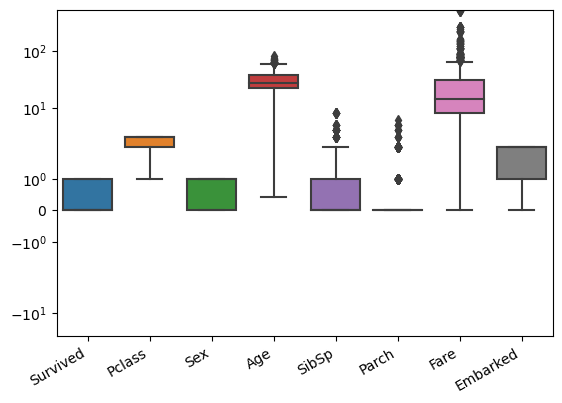

In [125]:
fig = plt.figure()
sns.boxplot(data=titanic_train)
plt.yscale("symlog")
fig.autofmt_xdate()

Wir skalieren die Spalten `Pclass`, `Age`, `SibSp`, `Parch`, `Fare` und `Embarked` mit dem StandardScaler.

In [126]:
columns_to_scale = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked"]
scaler = StandardScaler()

std_scaled_tr = titanic_train.copy()
std_scaled_tr[columns_to_scale] = scaler.fit_transform(std_scaled_tr[columns_to_scale])

std_scaled_te = titanic_test.copy()
std_scaled_te[columns_to_scale] = scaler.transform(std_scaled_te[columns_to_scale])

In [127]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.500000,0,0,7.8292,1
893,3,0,47.000000,1,0,7.0000,2
894,2,1,62.000000,0,0,9.6875,1
895,3,1,27.000000,0,0,8.6625,2
896,3,0,22.000000,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,1,27.630201,0,0,8.0500,2
1306,1,0,39.000000,0,0,108.9000,0
1307,3,1,38.500000,0,0,7.2500,2


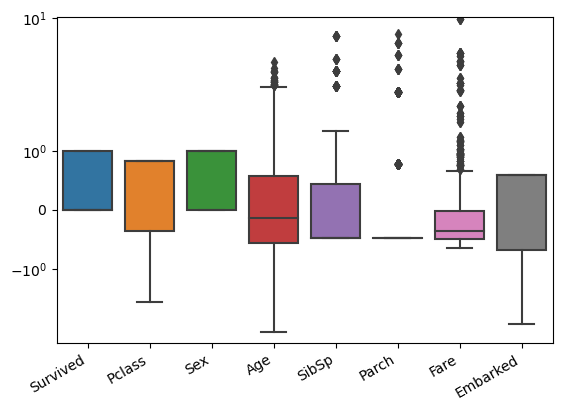

In [128]:
fig = plt.figure()
sns.boxplot(data=std_scaled_tr)
plt.yscale("symlog")
fig.autofmt_xdate()

In [129]:
std_scaled_tr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,0.827377,1,-0.568639,0.432793,-0.473674,-0.502445,0.585954
2,1,-1.566107,0,0.640148,0.432793,-0.473674,0.786845,-1.942303
3,1,0.827377,0,-0.266442,-0.474545,-0.473674,-0.488854,0.585954
4,1,-1.566107,0,0.413501,0.432793,-0.473674,0.420730,0.585954
5,0,0.827377,1,0.413501,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...,...
887,0,-0.369365,1,-0.190893,-0.474545,-0.473674,-0.386671,0.585954
888,1,-1.566107,0,-0.795286,-0.474545,-0.473674,-0.044381,0.585954
889,0,0.827377,0,-0.348587,0.432793,2.008933,-0.176263,0.585954


### 4.5 Ausreißer
Wir behandeln die Ausreißer in den Spalten `Age`, `SibSp`, `Parch` und `Fare`.

In [130]:
std_scaled_no_tr = std_scaled_tr.copy()

for col in std_scaled_no_tr[["Age", "SibSp", "Parch", "Fare"]].columns:
    q1 = std_scaled_no_tr[col].describe()['25%']
    q3 = std_scaled_no_tr[col].describe()['75%']
    IQR = q3 - q1
    high = q3 + (1.5*IQR)
    low = q1 - (1.5*IQR)
    std_scaled_no_tr[col] = std_scaled_no_tr[col].apply(lambda x: high if x>high else x)
    std_scaled_no_tr[col] = std_scaled_no_tr[col].apply(lambda x: low if x<low else x)


In [131]:
std_scaled_no_te = std_scaled_te.copy()

for col in std_scaled_no_te[["Age", "SibSp", "Parch", "Fare"]].columns:
    q1 = std_scaled_no_te[col].describe()['25%']
    q3 = std_scaled_no_te[col].describe()['75%']
    IQR = q3 - q1
    high = q3 + (1.5*IQR)
    low = q1 - (1.5*IQR)
    std_scaled_no_te[col] = std_scaled_no_te[col].apply(lambda x: high if x>high else x)
    std_scaled_no_te[col] = std_scaled_no_te[col].apply(lambda x: low if x<low else x)

## 5 Klassifikatoren

Wir werden folgende Klassifikatoren testen:

- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machines (SVM)
- Neural Networks

Wir erstellen für jeden Klassifikator eine Liste von Parametern und Werten, lassen diese von GridSearchCV kreuzvalidieren und merken uns jeweils die beste Parameterkombination.

In [132]:
X = std_scaled_no_tr.drop("Survived", axis=1)
y = std_scaled_no_tr.Survived

In [133]:
res = pd.DataFrame(columns=["mean score training", "mean score test", "params"]) 

In [134]:
def do_cv_stuff(estimator, param_grid, X, y):
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)
    
    grid_search = GridSearchCV(estimator=estimator, 
                               param_grid=param_grid, 
                               scoring="accuracy", 
                               n_jobs=-1,
                               cv=cv,
                               return_train_score=True)
    
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    cv_results = grid_search.cv_results_
    
    best_mean_test_score = cv_results["mean_test_score"][grid_search.best_index_]
    best_mean_train_score = cv_results["mean_train_score"][grid_search.best_index_]
    
    print(f"{best_mean_train_score = :<10}")
    print(f"{best_mean_test_score = :<10}")
    print(f"{best_params = }")
    
    return (best_model.__class__.__name__, best_mean_train_score, best_mean_test_score,  best_params)

### 5.1 K-Nearest Neighbors

In [135]:
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(1, 40),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

ans = do_cv_stuff(knn, param_grid, X, y)
res.loc[ans[0]] = ans[1:]

best_mean_train_score = 0.9797981310178546
best_mean_test_score = 0.8102755633670202
best_params = {'algorithm': 'brute', 'n_neighbors': 24, 'weights': 'distance'}


c:\Users\tk\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.77549432 0.77549432 0.79007595 0.78447053 0.80801582 0.79681125
 0.81026929 0.79119955 0.80914569 0.80132446 0.80241667 0.79457661
 0.79119327 0.79458289 0.79680497 0.79457661 0.78782248 0.7923357
 0.79678614 0.79457661 0.78779738 0.79683008 0.79677986 0.79794112
 0.79116189 0.79907099 0.79230431 0.80131191 0.79229804 0.80018831
 0.79679242 0.79906472 0.79341535 0.79905844 0.79005084 0.80355282
 0.79229804 0.80804093 0.79792857 0.80467642 0.79791601 0.80691733
 0.79791601 0.80578746 0.79565627 0.80915824 0.79791601 0.80915197
 0.80127425 0.80803465 0.80015693 0.80690478 0.80128052 0.80578118
 0.7945515  0.80690478 0.80463875 0.80578746 0.80127425 0.80689222
 0.80239784 0.80465131 0.80239784 0.80127425 0.80014437 0.80240412
 0.79232314 0.80127425 0.80015065 0.80352771 0.79119955 0.80241039
 0.79344046 0.79792229 0.78895863 0.7979222

### 5.2 Logistische Regression

In [136]:
lr = LogisticRegression(max_iter=1000)

param_grid = {
    "C": [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear"]
}

# nicht alle solver kommen mit allen penalties klar, deswegen unterdrücken wir Warnungen ausnahmsweise
warnings.filterwarnings("ignore") 

ans = do_cv_stuff(lr, param_grid, X, y)
res.loc[ans[0]] = ans[1:]

# Warnungen wieder anschalten...
warnings.resetwarnings()

best_mean_train_score = 0.8083580219676316
best_mean_test_score = 0.8046450316992029
best_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### 5.3 Decision Tree

In [137]:
tree = DecisionTreeClassifier()

param_grid = {
    "max_depth": [None, 3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

ans = do_cv_stuff(tree, param_grid, X, y)
res.loc[ans[0]] = ans[1:] 

best_mean_train_score = 0.8240682667002852
best_mean_test_score = 0.8136149645345553
best_params = {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### 5.4 Random Forest

In [138]:
forest = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10]
}

ans = do_cv_stuff(forest, param_grid, X, y)
res.loc[ans[0]] = ans[1:] 

best_mean_train_score = 0.8591420174291253
best_mean_test_score = 0.8349507250015693
best_params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


### 5.5 SVC

In [139]:
svc = SVC()

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

ans = do_cv_stuff(svc, param_grid, X, y)
res.loc[ans[0]] = ans[1:] 

best_mean_train_score = 0.8397828450761933
best_mean_test_score = 0.8225974515096354
best_params = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### 5.6 MLP

In [140]:
mlp = MLPClassifier(max_iter=10000)

param_grid = {
    "hidden_layer_sizes": [(10,), (50,), (100,), (10,10), (50, 50), (100, 100)],
    "alpha": [0.0001, 0.001, 0.01, 1, 5],
    "activation": ["logistic", "tanh", "relu"]
}

ans = do_cv_stuff(mlp, param_grid, X, y)
res.loc[ans[0]] = ans[1:] 

best_mean_train_score = 0.8411837937500986
best_mean_test_score = 0.8225911744397715
best_params = {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (50, 50)}


In [141]:
display(res)

,mean score training,mean score test,params
KNeighborsClassifier,0.979798,0.810276,"{'algorithm': 'brute', 'n_neighbors': 24, 'wei..."
LogisticRegression,0.808358,0.804645,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."
DecisionTreeClassifier,0.824068,0.813615,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s..."
RandomForestClassifier,0.859142,0.834951,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
SVC,0.839783,0.822597,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
MLPClassifier,0.841184,0.822591,"{'activation': 'relu', 'alpha': 1, 'hidden_lay..."


Man könnte natürlich noch weiter an den Hyperparametern rumschrauben, aber sehr viel besser werden die Ergebnisse vermutlich nicht werden, da sie bereits relativ dicht beieinander liegen.

## 6 Vorhersage für die Testdaten

Die besten Testscores liefern `RandomForestClassifier`, `SVC` und `MLPClassifier`. `RandomForestClassifier` hat den besten Testscore, overfittet aber ziemlich stark, da der Trainingsscore deutlich höher als der Testscore ist. `SVC` und `MLPClassifier` overfitten weniger und `SVC` hat einen leicht besseren Testscore. Deswegen werden wir nun `SVC` mit den oben ermittelten Parametern zur Vorhersage für die Testdaten anwenden.

In [142]:
svc = SVC(C=10, gamma='scale', kernel='rbf')

svc.fit(X, y) # die gesamten Trainingsdaten zum lernen nutzen

prediction = pd.DataFrame(svc.predict(std_scaled_no_te), columns=["Survived"], index=std_scaled_no_te.index) # skalierte Testdaten ohne Ausreißer

In [143]:
prediction

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [144]:
prediction.reset_index().to_csv("submission.csv", index=False)